# Grouping your data


In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
matplotlib.rcParams['axes.grid'] = True # show gridlines by default
%matplotlib inline

import pandas as pd

In [2]:
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

In [3]:
?download

In [4]:
YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator=GDP_INDICATOR, country=['GB','CN'],
start=YEAR-5, end=YEAR)
gdp = gdp.reset_index()
gdp

,country,year,NY.GDP.MKTP.CD
0,China,2013,9.570406e+12
1,China,2012,8.532230e+12
2,China,2011,7.551500e+12
3,China,2010,6.087164e+12
4,China,2009,5.101703e+12
5,China,2008,4.594307e+12
6,United Kingdom,2013,2.783251e+12
7,United Kingdom,2012,2.704017e+12
8,United Kingdom,2011,2.659882e+12
9,United Kingdom,2010,2.481580e+12


In [5]:
gdp.groupby('country')['NY.GDP.MKTP.CD'].aggregate(sum)

country
China             4.143731e+13
United Kingdom    1.596255e+13
Name: NY.GDP.MKTP.CD, dtype: float64

In [6]:
gdp.groupby('year')['NY.GDP.MKTP.CD'].aggregate(sum)

year
2008    7.515739e+12
2009    7.514093e+12
2010    8.568743e+12
2011    1.021138e+13
2012    1.123625e+13
2013    1.235366e+13
Name: NY.GDP.MKTP.CD, dtype: float64

In [7]:
LOCATION='comtrade_milk_uk_monthly_14.csv'

In [8]:
milk = pd.read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0
2,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,2520,NaN,3410,NaN,NaN,0


In [9]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk = milk[COLUMNS]

In [10]:
milk_world = milk[milk['Partner'] == 'World']
milk_countries = milk[milk['Partner'] != 'World']

In [11]:
milk_countries.to_csv('countrymilk.csv', index=False)

In [12]:
load_test = pd.read_csv('countrymilk.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,3410
1,2014,201401,Exports,United Kingdom,Austria,"Milk and cream, neither concentrated nor sweet...",0401,316


In [13]:
milk_imports = milk[milk['Trade Flow'] == 'Imports']
milk_countries_imports = milk_countries[milk_countries['Trade Flow'] == 'Imports']
milk_world_imports=milk_world[milk_world['Trade Flow'] == 'Imports']

In [14]:
milkImportsInJanuary2014 = milk_countries_imports[milk_countries_imports['Period'] == 201401]
milkImportsInJanuary2014.sort_values('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
23,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138
626,2014,201401,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,8020014
637,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,5966962
650,2014,201401,Imports,United Kingdom,Netherlands,"Milk and cream, concentrated or sweetened",0402,4650774
629,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, concentrated or sweetened",0402,4545873
4,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
612,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, concentrated or sweetened",0402,3584038
10,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
667,2014,201401,Imports,United Kingdom,Spain,"Milk and cream, concentrated or sweetened",0402,1850097
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872


In [15]:
groups = milk_countries.groupby('Trade Flow')

In [16]:
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
4,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
10,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872
17,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, neither concentrated nor sweet...",0401,1028700
23,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138


In [17]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

dict_keys([('0401', 'Exports'), ('0401', 'Imports'), ('0402', 'Exports'), ('0402', 'Imports')])

In [18]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW )

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
15,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872
68,2014,201402,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1444455
120,2014,201403,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1414291
171,2014,201404,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1912257
223,2014,201405,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1638838
273,2014,201406,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1449614
327,2014,201407,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,2096771
370,2014,201408,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1474883
416,2014,201409,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1259777
466,2014,201410,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1483422


In [19]:
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort_values("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
954,2014,201406,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,22411564
880,2014,201405,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,19656679
811,2014,201404,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,14875816
841,2014,201404,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11712344
773,2014,201403,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11015471


In [20]:
data=[['A',10],['A',15],['A',5],['A',20],
['B',10],['B',10],['B',5],
['C',20],['C',30]]

df = pd.DataFrame(data=data, columns=["Commodity","Amount"])
df

,Commodity,Amount
0,A,10
1,A,15
2,A,5
3,A,20
4,B,10
5,B,10
6,B,5
7,C,20
8,C,30


In [21]:
grouped = df.groupby('Commodity')

In [22]:
grouped.groups.keys()

dict_keys(['A', 'B', 'C'])

In [23]:
grouped.get_group('B')

,Commodity,Amount
4,B,10
5,B,10
6,B,5


In [24]:
grouped = df.groupby( ['Commodity','Year'])

KeyError: 'Year'

In [25]:
grouped.get_group( ('A',2014) )

KeyError: ('A', 2014)

In [26]:
grouped=df.groupby('Commodity')
grouped.aggregate(sum)

,Amount
Commodity,
A,50
B,25
C,50


In [27]:
def top2byAmount(g):
    return g.sort_values('Amount', ascending=False).head(2)
grouped.apply(top2byAmount)

Commodity  Amount
Commodity                    
A         3         A      20
          1         A      15
B         4         B      10
          5         B      10
C         8         C      30
          7         C      20

In [28]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107770
0402    341777173
Name: Trade Value (US$), dtype: int64

In [29]:
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107771
0402    341777171
Name: Trade Value (US$), dtype: int64

In [30]:
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
Ireland,174315886
France,105008176
Germany,76612700
Netherlands,72209235
Belgium,58338745


<AxesSubplot:ylabel='Commodity Code'>

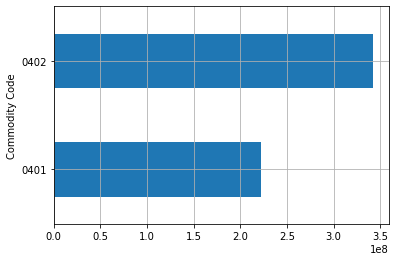

In [31]:
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

In [32]:
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                           Trade Flow  Period
Milk and cream, concentrated or sweetened           Imports     201401    30423330
                                                                201402    20614513
                                                                201403    26335257
                                                                201404    24770338
                                                                201405    26409462
                                                                201406    29081876
                                                                201407    25668642
                                                                201408    23360790
                                                                201409    37418160
                                                                201410    38012444
                                                                201411    39465351
                

In [33]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

sum  \
Commodity                                          Trade Flow Period             
Milk and cream, concentrated or sweetened          Exports    201401  40215103   
                                                              201402  32298379   
                                                              201403  42987355   
                                                              201404  52900517   
                                                              201405  55987927   
                                                              201406  59594101   
                                                              201407  33370590   
                                                              201408  35080215   
                                                              201409  27320915   
                                                              201410  30387862   
                                                              201411  23417285   
                                                              201412  31301034   
                                                   Imports    201401  30423330   
                                                              201402  20614513   
                                                              201403  26335257   
                                                              201404  24770338   
                                                              201405  26409462   
                                                              201406  29081876   
                                                              201407  25668642   
                                                              201408  23360790   
                                                              201409  37418160   
                                                              201410  38012444   
                                                              201411  39465351   
                                                              201412  20217008   
Milk and cream, neither concentrated nor sweetened Exports    201401  46923551   
                                                              201402  40191337   
                                                              201403  43794069   
                                                              201404  42295261   
                                                              201405  40213208   
                                                              201406  39721799   
                                                              201407  39508126   
                                                              201408  26657488   
                                                              201409  33279378   
                                                              201410  26615555   
                                                              201411  25876673   
                                                              201412  28714207   
                                                   Imports    201401  21950746   
                                                              201402  18685554   
                                                              201403  17984197   
                                                              201404  19440269   
                                                              201405  21665662   
                                                              201406  16022428   
                                                              201407  19128109   
                                                              201408  16934043   
                                                              201409  19284385   
                                                              201410  18353099   
                                                              201411  17617864   
                                                         

<AxesSubplot:ylabel='Commodity Code,Period'>

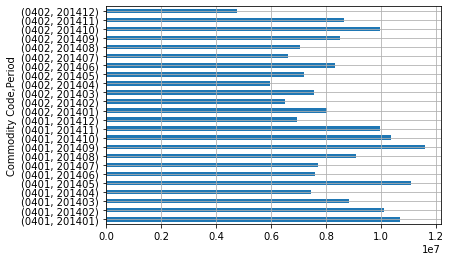

In [34]:
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

In [35]:
milk_bypartner_total=milk[milk["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.head(5)

Partner
Austria         798816
Belgium       58338745
Czech Rep.     1254989
Denmark       30534642
Finland             12
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

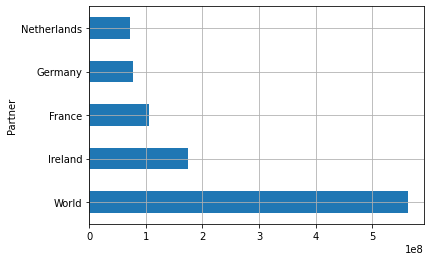

In [36]:
milk_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

## Filtering groups


Being able to group rows according to some criterion and then apply various operations to
those groups is a very powerful technique.
However, there may be occasions when you only want to work with a subset of the groups
that can be extracted from a single dataset based on a particular group property. For
example, it might require that:
- groups that contain a minimum number of rows, such as countries that engage in
trade around a particular commodity with a minimum number of partner countries

- groups for whom a summary statistic meets certain conditions (for example, the total
value of exports for a particular commodity exceeds a particular threshold value, or
whose minimum or maximum value are below a certain value)

- a ranking of the groups based on a particular summary statistic, such as the total
trade value, that returns only the top five or bottom three groups according to that
ranking.

In the following example, where groups are selected based on group size, a filtering
operation is applied to limit an original dataset so that it includes just those groups
containing at least three rows, combining the rows from the selected groups back together
again to produce the output dataset:


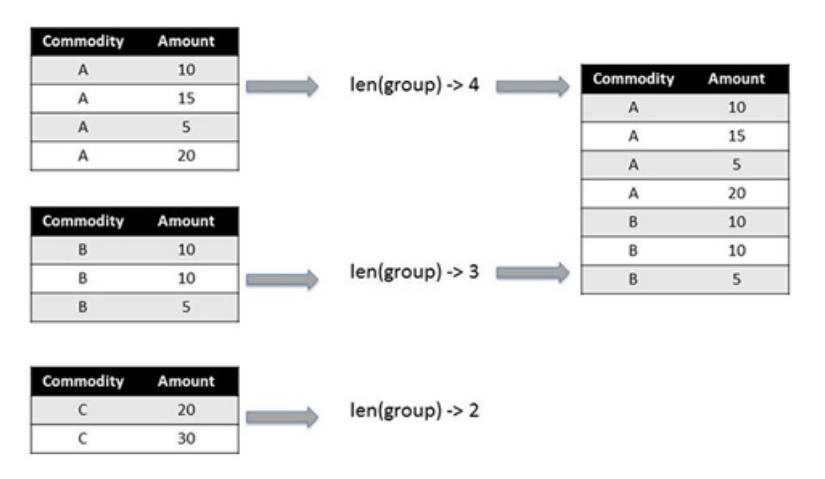

In pandas, groups can be filtered based on their group properties using the filter()
method. Using the example dataframe again:

In [37]:
df

,Commodity,Amount
0,A,10
1,A,15
2,A,5
3,A,20
4,B,10
5,B,10
6,B,5
7,C,20
8,C,30


For example, the dataframe can be filtered to return just the rows from groups where there
is a maximum number of rows in the group.
As a reference point, count how many rows are associated with each group.

In [38]:
grouped = df.groupby('Commodity')
grouped.aggregate(len)

,Amount
Commodity,
A,4
B,3
C,2


The **filter()** method uses a function that returns a boolean **( True or False )** value to
decide whether or not to filter through the rows associated with a particular group.
As with the **apply()** method, provide the **filter()** method with just a function name in
order to pass each group to that function. For example, define a function that says
whether or not a group contains three or fewer rows and use that as a basis for filtering the
original dataset.

In [39]:
def groupsOfAtMostThreeRows(g):
    return len(g) <= 3
grouped.filter(groupsOfAtMostThreeRows)

,Commodity,Amount
4,B,10
5,B,10
6,B,5
7,C,20
8,C,30


Alternatively, all the rows in a group can be filtered on an aggregate property of the group
such as the sum total, or maximum, minimum or mean value, from one of the columns.

In [40]:
#Consider the following total amounts by group
grouped.aggregate(sum)

,Amount
Commodity,
A,50
B,25
C,50


In [41]:
pd.pivot_table(df,index=['Commodity','Partner'],values='Amount',aggfunc=sum)

KeyError: 'Partner'

The ability to filter datasets based on group properties means that large datasets can
more easily be limited to just those rows associated with groups of rows that are deemed
to be relevant in some way.

If you have a large dataset that can be split into multiple groups but for which you only want to report on groups that have a particular property, the `filter()` method can be used to apply a test to a group and only return rows from groups that pass a particular group-wide test. If the test evaluates as `False`, the rows included in that group will be ignored.

Consider the following simple test dataset:

In [42]:
df = pd.DataFrame({'Commodity' : ['Fish', 'Milk', 'Eggs', 'Fish', 'Milk'],
                'Trade Flow' : ['Import', 'Import', 'Import', 'Export','Export'],
                'Value' : [1,2,4,8,16]})
df

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4
3,Fish,Export,8
4,Milk,Export,16


One reason for filtering a dataset might be to exclude 'sparse' or infrequently occurring items, such as trade partners who only seem to trade for less than six months of the year.

To select just the groups that contain more than a certain number of rows, define a function to test the length (that is, the number of rows) of each group and return a `True` or `False` value depending on the test.

In the following case, group by trade flow and only return rows from groups containing three or more rows.

In [43]:
def groupsOfThreeOrMoreRows(g):
    return len(g) >= 3

df.groupby('Trade Flow').filter(groupsOfThreeOrMoreRows)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
2,Eggs,Import,4


You can also select groups based on other group properties. For example, you might select just the groups where the total value for a particular column within a group exceeds a certain threshold.

In the following case, select just those commodities where the sum of import and export values is greater than a certain amount to indicate which ones have a large value of trade, in whatever direction, associated with them. First group by the commodity, then filter on the group property of interest.

In [44]:
def groupsWithValueGreaterThanFive(g):
    return g['Value'].sum() > 5

df.groupby('Commodity').filter(groupsWithValueGreaterThanFive)

,Commodity,Trade Flow,Value
0,Fish,Import,1
1,Milk,Import,2
3,Fish,Export,8
4,Milk,Export,16


### Filtering on the Comtrade data

Now try filtering the Comtrade data relating to the milk imports. Start by creating a subset of the data containing only rows where the total trade value of imports for a particular commodity and partner is greater than $25 million (that is, 25000000).

In [45]:
def groupsWithImportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=milk_countries_imports.groupby(['Commodity','Partner']).filter(groupsWithImportsOver25million)

Check the filtering by grouping on the commodity and partner and summing the result.

In [46]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                           Partner    
Milk and cream, concentrated or sweetened           Belgium         36155409
                                                    France          85631781
                                                    Germany         59776965
                                                    Ireland         62936247
                                                    Netherlands     61531712
Milk and cream, neither concentrated nor sweetened  Denmark         29432607
                                                    Ireland        111379639
Name: Trade Value (US$), dtype: int64

As before, you can plot the results.

<AxesSubplot:ylabel='Commodity,Partner'>

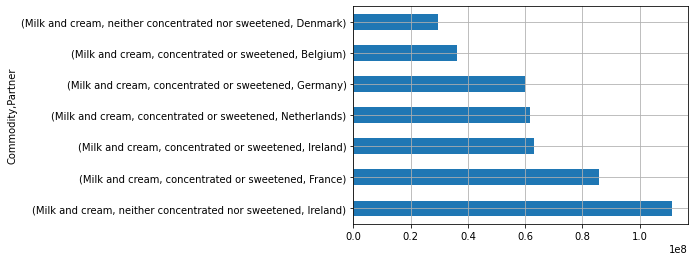

In [47]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False).plot(kind='barh')

Logical tests can be combined in a filter function, for example testing for partners that only appear to trade infrequently *or* for small total amounts in any particular commodity.

In [48]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_milk_countries_imports=milk_countries_imports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_imports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Milk and cream, concentrated or sweetened          Greece                                   1   
                                                   Hungary                                  8   
                                                   Latvia                                   1   
                                                   Luxembourg                               1   
                                                   New Zealand                              1   
                                                   United Arab Emirates                     2   
                                                   United States of America                 2   
Milk and cream, neither concentrated nor sweetened Finland                                  1   
                                                   Latvia                                   4   
                                                   Spain                                    1   
                                                   Ukraine                                  1   
                                                   United States of America                 1   

                                                                                    
                                                                               sum  
Commodity                                          Partner                          
Milk and cream, concentrated or sweetened          Greece                        7  
                                                   Hungary                    4956  
                                                   Latvia                      432  
                                                   Luxembourg                23724  
                                                   New Zealand               19291  
                                                   United Arab Emirates       5779  
                                                   United States of America   4375  
Milk and cream, neither concentrated nor sweetened Finland                      12  
                                                   Latvia                     1678  
                                                   Spain                        68  
                                                   Ukraine                    3733  
                                                   United States of America   2415

In this report, many of the listed countries appear to have traded in only one or two months; but while Hungary traded concentrated/sweetened products eight times, the total trade value was not very significant at all.

### Tasks

Filter the dataset so that it only contains rows where the total exports across all the milk products for a particular country are at least two million dollars in any given monthly period. (HINT: group on partner and period and filter against a function that tests the minimum trade value exceeds the required value.)

Generate a chart from that dataset that displays the sum total trade value for each partner. (HINT: group on the partner and then aggregate on the sum.)

Using your own monthly data for a single year, which countries only trade in your selected trade item rarely or for small amounts? Which partners trade on a regular basis (for example, in at least nine of the months)? 

Can you also find countries that trade regularly but only for small amounts (for example whose maximum monthly trade value is less than a certain threshold amount) or who trade infrequently but for large amounts (or other combinations thereof)?

In [49]:
milk_exports = milk[milk['Trade Flow'] == 'Exports']
milk_countries_exports = milk_countries[milk_countries['Trade Flow'] == 'Exports']
milk_world_exports=milk_world[milk_world['Trade Flow'] == 'Exports']

In [51]:
def groupWithExportsOver2million(g):
    return g['Trade Value (US$)'].sum() > 2000000

rows=milk_countries_exports.groupby(['Commodity', 'Partner']).filter(groupWithExportsOver2million)

In [52]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                           Partner              
Milk and cream, concentrated or sweetened           Algeria                   93753841
                                                    Angola                    13305815
                                                    Belgium                    6301229
                                                    Burkina Faso               4239833
                                                    China                     15511639
                                                    China, Hong Kong SAR      15524358
                                                    Congo                      6407358
                                                    Cuba                       5593085
                                                    Côte d'Ivoire             17732776
                                                    Dem.Rep. of the Congo      5836578
                                                    Egyp

In [58]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<30000

weak_milk_countries_exports=milk_countries_exports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_milk_countries_exports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Milk and cream, concentrated or sweetened          Bahrain                                  2   
                                                   Barbados                                 2   
                                                   Bulgaria                                 8   
                                                   Cayman Isds                              4   
                                                   Croatia                                  1   
                                                   Equatorial Guinea                        1   
                                                   Estonia                                  4   
                                                   Falkland Isds (Malvinas)                 2   
                                                   Finland                                 11   
                                                   Greece                                  12   
                                                   Iceland                                  1   
                                                   Israel                                   1   
                                                   Latvia                                   4   
                                                   Lithuania                                1   
                                                   Luxembourg                               3   
                                                   New Zealand                              1   
                                                   Oman                                     1   
                                                   Romania                                  4   
                                                   Saint Kitts and Nevis                    2   
                                                   Slovakia                                 2   
                                                   Switzerland                              3   
Milk and cream, neither concentrated nor sweetened Antigua and Barbuda                      4   
                                                   Australia                                3   
                                                   Austria                                 10   
                                                   Bahrain                                  3   
                                                   Barbados                                 2   
                                                   Bermuda                                  4   
                                                   Bulgaria                                 1   
                                                   Cayman Isds                              1   
                                                   Croatia                                  1   
                                                   Czech Rep.                               2   
                                                   Dominica                                 1   
                                                   Equatorial Guinea                        2   
                                                   Estonia                                  2   
                                                   Greece                                  10   
                                                   Iceland                                  1   
                                                   Kuwait                                   2   
                                                   Latvia                                   1   
                                                   Libya                                    1   
  

In [61]:
def strongpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<2000000

strong_milk_countries_exports=milk_countries_exports.groupby(['Commodity','Partner']).filter(strongpartner)
strong_milk_countries_exports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Milk and cream, concentrated or sweetened          Antigua and Barbuda                      6   
                                                   Australia                                3   
                                                   Austria                                 12   
                                                   Bahrain                                  2   
                                                   Bangladesh                               4   
...                                                                                       ...   
Milk and cream, neither concentrated nor sweetened Uganda                                   1   
                                                   Ukraine                                  1   
                                                   United Arab Emirates                    10   
                                                   United States of America                12   
                                                   Viet Nam                                11   

                                                                                      
                                                                                 sum  
Commodity                                          Partner                            
Milk and cream, concentrated or sweetened          Antigua and Barbuda         59352  
                                                   Australia                   88733  
                                                   Austria                    130544  
                                                   Bahrain                     12241  
                                                   Bangladesh                1694708  
...                                                                              ...  
Milk and cream, neither concentrated nor sweetened Uganda                      11545  
                                                   Ukraine                      2587  
                                                   United Arab Emirates       406956  
                                                   United States of America  1244030  
                                                   Viet Nam                   139156  

[147 rows x 2 columns]

## Interactive pivot table

One of the most useful, if poorly understood, features offered by many spreadsheet
applications is the ‘pivot table’.
Pivot tables provide a way of creating summary reports over particular parts of a dataset,
reshaping the data into grouped rows, itemised columns, and summary values within
each group and item.

The screenshot of the interactive pivot table shown below, based on a widget originally
created by Nicolas Krutchen at Datacritic, contains a small fragment of the Comtrade data
describing milk imports to the UK.
The pivot table is organised as follows:

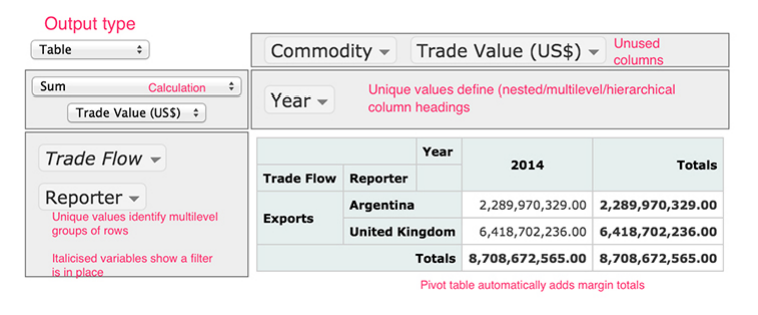

You can see how the ‘Trade Flow’ and ‘Reporter’ columns are used to group the data, with
each row representing a separate group. In addition, the values in the ‘Year’ column are
broken out to create separate columns (although in this example there is only data for one
year, and hence one ‘Year’ column, 2014). The function that is applied to the grouped data
is a sum operation, and it is applied to the selected ‘Trade Value (US$)’ column in the
original dataset. A marginal total value is calculated by summing across all the columns.

The ‘Commodity’ and ‘Trade Value (US$)’ columns, while part of the original dataset, are
not directly used to define the pivot table’s structure; that is, they are not used to set the
row or column index header labels in the displayed pivot table.
In terms of the split-apply-combine pattern, the pivot table operates as follows:

- the column names from the original dataframe that are listed in the rows panel on the
left hand side of the interactive pivot table split the data into a set of groups, with
each row specifying a group

- the pivot table’s columns are set according to the unique values associated with the
specified columns from the orignal dataframe; these break the data down into yet
smaller groups that are associated with each cell.

The selected operator is then applied to each cell level group, the results combined and
an appropriately structured output table is displayed.
To create a pivot table report for a dataset, typically three actions will be needed:

- identify what elements will appear as the row index values – that is, how the rows will
be grouped. Typically, groups will be created based on the unique values within a
single column or a combination of values, one from each of multiple grouping
columns.

- identify what elements will appear as column headings. Again, the column heading
may just be the unique values of a single variable, or combined values across
multiple grouping columns.

- identify what numbers will be reported on. This step may often break down into two
smaller steps:

- to count the number of rows associated with a particular combination of row and
column index values, select the count operation

- to perform an operation on the value of cells in another column, select that
column and then identify what operation to apply to it. 

For example, find the sum or mean values of a numerical quantity associated with rows keyed by the row
and column index values, or count the number of unique values of a particular
variable in rows identified by those key values.


In addition, one or more ‘filters’ can be added to the selection of row and column index
values, either limiting which unique values in each key column to report on, or, by default,
selecting them all.

It is often easier to understand how a pivot table is organised by using it interactively.
You’ll get a chance to do this in the next exercise.

The interactive pivot table contains a fragment of the milk data downloaded from Comtrade relating to the leading partner importers of milk products to the UK. (**Note:** If you can't see the pivot table, check you have downloaded it to the same folder as this notebook and run the cell below.)

Configure the pivot table by dragging the labels into the appropriate row and column selection areas. (You do not need to add all the labels to those areas). Select the aggregation type using the calculation list (which defauts to *count*). Click on the down arrow associated with a label in order to select a subset of values associated with that label.

Use the interactive pivot table to generate reports that display:

- a single column containing the total value of each trade flow for each commodity  each year (in rows: Year, Commodity, Trade Flow; no columns; sum Trade Value(US$))
- for each year and each commodity, a column containing the total trade value by Trade flow (rows: year, commodity; cols Trade Flow; sum trade value)
- the total exports for each partner country (rows) by year (columns). Row: partner, trade flow with filter set to export); col: year; sum trade value

In [62]:
from IPython.display import HTML,IFrame

IFrame('comtrade_pivot.html',width=1000,height=600)


## Task

Try to come up with some of your own questions and then see if you can use the pivot table to answer them.

For example, see if you can use the table to find:

- the total value by partner country of each commodity type (with each row corresponding to a particular country)
- the total value of trade in commodity type for each month of the year
- the leading partners associated with the 0402 commodity code
- the minimum trade value, by month and commodity type, for Ireland.


**Now go back to the course.**

## Pivot tables with pandas


The interactive pivot table provides a convenient way of exploring a relatively small
dataset directly within a web browser. (A python package is also available that allows
interactive pivot tables to be created directly from a pandas dataframe.)

You can also achieve a similar effect using code, one-line-at-a-time. In this step, you will
learn how to ask – and answer – questions of a similar form to the ones you raised using
the interactive pivot table, but this time using programming code.
There are several reasons why you might want to automate pivot table operations you
might previously have done by hand. These include:

- having a record of all the steps used to perform a particular task, or analysis, which
can be useful if you need to check or provide evidence about what you have done
(transparency)

- being able to repeat the task automatically; this is particularly useful if you need to
perform the same task repeatedly – for example, generating a new summary report
each time a dataset is updated with new weekly or daily figures

- being able to apply one analysis to another dataset. For example, you might want to
produce the same sort of pivot table reports to similarly organised datasets but
differently populated datasets (for example, Comtrade datasets that refer to different
groups of countries and/or different commodity types).
In order to use the interactive pivot table, you had to identify:


- what column(s) in the dataset to use to define the row groupings in the pivot table

- what column(s) in the dataset to use to define the column groupings in the pivot table

- what column in the dataset to use as the basis for the pivot table summary function
what summary function to use.

The process is similar when it comes to using pivot tables in pandas. Indeed, you might
find it useful to use the interactive pivot table to help you identify just what needs to go
where in order to generate a particular report using the pandas pivot table.

Pivot tables can be quite hard to understand, so if you want a gentle dataset to pratice with, here is the simple example dataset used in the previous step that you can try out a few pivot table functions on.

In [63]:
#Example dataframe
df = pd.DataFrame({"Commodity":["A","A","A","A","B","B","B","C","C"],
                  "Amount":[10,15,5,20,10,10,5,20,30],
                  "Reporter":["P","P","Q","Q","P","P","Q","P","Q"],
                  "Flow":["X","Y","X","Y","X","Y","X","X","Y"]},
                 columns=["Commodity","Reporter","Flow","Amount"])

df

,Commodity,Reporter,Flow,Amount
0,A,P,X,10
1,A,P,Y,15
2,A,Q,X,5
3,A,Q,Y,20
4,B,P,X,10
5,B,P,Y,10
6,B,Q,X,5
7,C,P,X,20
8,C,Q,Y,30


### Getting started with pivot tables in pandas 

The pandas library provides a `pivot_table()` function into which you can pass the elements needed to define the pivot table view you would like to generate over a particular dataset.

If you inspect the documentation for the pandas `pivot_table()` function, you will see that it is quite involved (but *DON'T PANIC!*).

In [64]:
##Inspect the documentation for the pandas pivot_table() function
##Uncomment the following command (remove the #) and then click the play button in the toolbar to run the cell
#?pivot_table
##The documentation file should pop up from the bottom of the browser.
##Click the x to close it.

You can start to use the pivot table quite straightforwardly, drawing inspiration from the way you configured the interactive pivot table. The function itself takes the form:

`pd.pivot_table(DATAFRAME,
                index= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_ROWS,
                columns= (LIST_OF_)DATA_COLUMN(S)_THAT_DEFINE_PIVOT_TABLE_COLUMNS
                values= DATA_COLUMN_TO_APPLY_THE SUMMARYFUNCTION_TO,
                aggfunc=sum
               )`


You can generate a pivot table that shows the total trade value as a single column, grouped into row based subdivisions based on year, country, trade flow and commodity in the following way.

The following pivot table reports on a subset of countries. The `isin()` method selects rows whose partner value 'is in' the list of specified partners.

In [65]:
KEYPARTNERS = ['Belgium','France','Germany','Ireland','Netherlands','Denmark']
milk_keypartners = milk_countries[milk_countries['Partner'].isin(KEYPARTNERS)]

pd.pivot_table(milk_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

Trade Value (US$)
Year Partner     Trade Flow Commodity                                                            
2014 Belgium     Exports    Milk and cream, concentrated or sweetened                     6301229
                            Milk and cream, neither concentrated nor sweetened           23041778
                 Imports    Milk and cream, concentrated or sweetened                    36155409
                            Milk and cream, neither concentrated nor sweetened           22183336
     Denmark     Exports    Milk and cream, concentrated or sweetened                     1849170
                            Milk and cream, neither concentrated nor sweetened            1059287
                 Imports    Milk and cream, concentrated or sweetened                     1102035
                            Milk and cream, neither concentrated nor sweetened           29432607
     France      Exports    Milk and cream, concentrated or sweetened                     9025441
                            Milk and cream, neither concentrated nor sweetened           25597541
                 Imports    Milk and cream, concentrated or sweetened                    85631781
                            Milk and cream, neither concentrated nor sweetened           19376395
     Germany     Exports    Milk and cream, concentrated or sweetened                    24785683
                            Milk and cream, neither concentrated nor sweetened           11310950
                 Imports    Milk and cream, concentrated or sweetened                    59776965
                            Milk and cream, neither concentrated nor sweetened           16835735
     Ireland     Exports    Milk and cream, concentrated or sweetened                    94889874
                            Milk and cream, neither concentrated nor sweetened          326338567
                 Imports    Milk and cream, concentrated or sweetened                    62936247
                            Milk and cream, neither concentrated nor sweetened          111379639
     Netherlands Exports    Milk and cream, concentrated or sweetened                    47518672
                            Milk and cream, neither concentrated nor sweetened           21130410
                 Imports    Milk and cream, concentrated or sweetened                    61531712
                            Milk and cream, neither concentrated nor sweetened           10677523

If you just want to use a single data column from the original dataset to specify the row (that is, the `index`) groupings or the column groupings, you don't need to use a list, just pass in the name of the appropriate original data column.

So, to look at rows grouped by year, country and commodity, and split columns out by trade flow:

In [66]:
#For convenience, let's assign the output of this pivot table operation to a variable...
report = pd.pivot_table(milk_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)

#And then display the result, sorted by import value
report.sort_values('Imports', ascending=False)

Trade Flow                                                             Exports  \
Year Partner     Commodity                                                       
2014 Ireland     Milk and cream, neither concentrated nor sweetened  326338567   
     France      Milk and cream, concentrated or sweetened             9025441   
     Ireland     Milk and cream, concentrated or sweetened            94889874   
     Netherlands Milk and cream, concentrated or sweetened            47518672   
     Germany     Milk and cream, concentrated or sweetened            24785683   
     Belgium     Milk and cream, concentrated or sweetened             6301229   
     Denmark     Milk and cream, neither concentrated nor sweetened    1059287   
     Belgium     Milk and cream, neither concentrated nor sweetened   23041778   
     France      Milk and cream, neither concentrated nor sweetened   25597541   
     Germany     Milk and cream, neither concentrated nor sweetened   11310950   
     Netherlands Milk and cream, neither concentrated nor sweetened   21130410   
     Denmark     Milk and cream, concentrated or sweetened             1849170   

Trade Flow                                                             Imports  
Year Partner     Commodity                                                      
2014 Ireland     Milk and cream, neither concentrated nor sweetened  111379639  
     France      Milk and cream, concentrated or sweetened            85631781  
     Ireland     Milk and cream, concentrated or sweetened            62936247  
     Netherlands Milk and cream, concentrated or sweetened            61531712  
     Germany     Milk and cream, concentrated or sweetened            59776965  
     Belgium     Milk and cream, concentrated or sweetened            36155409  
     Denmark     Milk and cream, neither concentrated nor sweetened   29432607  
     Belgium     Milk and cream, neither concentrated nor sweetened   22183336  
     France      Milk and cream, neither concentrated nor sweetened   19376395  
     Germany     Milk and cream, neither concentrated nor sweetened   16835735  
     Netherlands Milk and cream, neither concentrated nor sweetened   10677523  
     Denmark     Milk and cream, concentrated or sweetened             1102035

One of the features of the interactive pivot table you did not explore was its ability to generate bar chart style views over the pivoted data as well as tabulated results. (In fact, this requires a plugin to the pivot table that has not been installed.)

In the same way that you produced charts from pandas dataframes previously, you can visualise the contents of the dataframe produced from the pivot table operation.

<AxesSubplot:ylabel='Year,Partner,Commodity'>

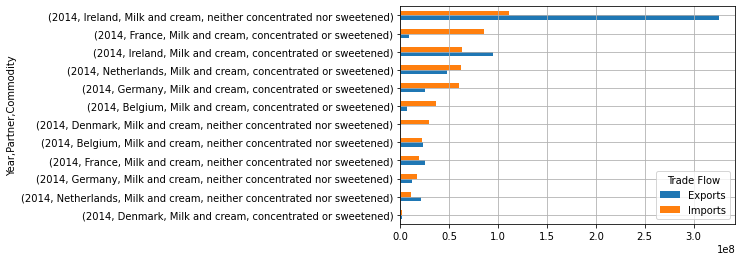

In [67]:
report.sort_values('Imports').plot(kind='barh')

Here, the `.plot()` command produces a *grouped bar chart* with the bars grouped according to the order of the row index values. The values contained within any numerical columns are then displayed as bars.

### Task

Using your own data set containing data for both imports and exports of a particular trade item, see if you can use a pandas pivot table to answer the same questions you asked on the late analysis we did, as well as asking some new ones.

For example, try to use a pivot table to identify partner countries engaging in 'bi-derectional' trade who have total import values and export values greater than a certain threshold every month.

You can also use a pivot table in combination with other operations. For example, try using one of the filtered datasets you created using the `filter()` function, such as one that limited rows to partners trading above a certain level, as the basis for a pivot table report.

In [68]:
LOCATION = 'comtrade_coffee_kenya_monthly_20.csv'

In [69]:
coffee = pd.read_csv(LOCATION, dtype={'Commodity Code':str, 'Reporter Code':str})
coffee.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2020,202001,January 2020,4,0,1,Imports,404,Kenya,...,NaN,NaN,NaN,NaN,170942,NaN,451901,NaN,NaN,0
1,HS,2020,202001,January 2020,4,0,2,Exports,404,Kenya,...,NaN,NaN,NaN,NaN,2707905,NaN,10207365,NaN,NaN,0
2,HS,2020,202001,January 2020,4,0,2,Exports,404,Kenya,...,NaN,NaN,NaN,NaN,105999,NaN,470559,NaN,NaN,0
3,HS,2020,202001,January 2020,4,0,1,Imports,404,Kenya,...,NaN,NaN,NaN,NaN,60,NaN,874,NaN,NaN,0
4,HS,2020,202001,January 2020,4,0,2,Exports,404,Kenya,...,NaN,NaN,NaN,NaN,503191,NaN,1640361,NaN,NaN,0


In [70]:
COLUMN = ['Year', 'Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity', 'Commodity Code', ' Trade Value (US$)']
coffee = coffee[COLUMNS]

In [71]:
coffee_world = coffee[coffee['Partner'] =='World']
coffee_countries = coffee[coffee['Partner'] != 'World']

In [72]:
coffee_countries.to_csv('coutrycoffee.csv', index=False)

In [73]:
load_test = pd.read_csv('countrycoffee.csv', dtype={'Commodity Code':str, 'Reporter Code':str})
load_test.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2020,202001,Exports,Kenya,Australia,"Coffee, whether or not roasted or decaffeinate...",0901,470559
1,2020,202001,Imports,Kenya,Belgium,"Coffee, whether or not roasted or decaffeinate...",0901,874
2,2020,202001,Exports,Kenya,Belgium,"Coffee, whether or not roasted or decaffeinate...",0901,1640361
3,2020,202001,Exports,Kenya,Canada,"Coffee, whether or not roasted or decaffeinate...",0901,155879
4,2020,202001,Imports,Kenya,Dem.Rep. of the Congo,"Coffee, whether or not roasted or decaffeinate...",0901,32448


In [74]:
coffee_imports = coffee[coffee['Trade Flow'] == 'Imports']
coffee_countries_imports = coffee_countries[coffee_countries['Trade Flow'] == 'Imports']
coffee_world_imports=coffee_world[coffee_world['Trade Flow'] == 'Imports']

In [75]:
coffeeImportsInJanuary2020 = coffee_countries_imports[coffee_countries_imports['Period'] == 202001]
coffeeImportsInJanuary2020.sort_values('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
31,2020,202001,Imports,Kenya,Rwanda,"Coffee, whether or not roasted or decaffeinate...",0901,287444
27,2020,202001,Imports,Kenya,Nicaragua,"Coffee, whether or not roasted or decaffeinate...",0901,69953
41,2020,202001,Imports,Kenya,Uganda,"Coffee, whether or not roasted or decaffeinate...",0901,52460
6,2020,202001,Imports,Kenya,Dem.Rep. of the Congo,"Coffee, whether or not roasted or decaffeinate...",0901,32448
34,2020,202001,Imports,Kenya,South Africa,"Coffee, whether or not roasted or decaffeinate...",0901,4939
40,2020,202001,Imports,Kenya,United Arab Emirates,"Coffee, whether or not roasted or decaffeinate...",0901,1957
3,2020,202001,Imports,Kenya,Belgium,"Coffee, whether or not roasted or decaffeinate...",0901,874
43,2020,202001,Imports,Kenya,United Kingdom,"Coffee, whether or not roasted or decaffeinate...",0901,533
11,2020,202001,Imports,Kenya,Germany,"Coffee, whether or not roasted or decaffeinate...",0901,485
19,2020,202001,Imports,Kenya,Rep. of Korea,"Coffee, whether or not roasted or decaffeinate...",0901,340


In [76]:
groups = coffee_countries.groupby('Trade Flow')

In [77]:
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
3,2020,202001,Imports,Kenya,Belgium,"Coffee, whether or not roasted or decaffeinate...",0901,874
6,2020,202001,Imports,Kenya,Dem.Rep. of the Congo,"Coffee, whether or not roasted or decaffeinate...",0901,32448
7,2020,202001,Imports,Kenya,Denmark,"Coffee, whether or not roasted or decaffeinate...",0901,39
11,2020,202001,Imports,Kenya,Germany,"Coffee, whether or not roasted or decaffeinate...",0901,485
15,2020,202001,Imports,Kenya,Italy,"Coffee, whether or not roasted or decaffeinate...",0901,158


In [78]:
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = coffee_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

dict_keys([('0901', 'Exports'), ('0901', 'Imports'), ('090122', 'Exports'), ('090122', 'Imports')])

In [79]:
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = coffee_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('United States of America','Exports')
groups.get_group( GROUP_PARTNERFLOW )

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
47,2020,202001,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,1342207
95,2020,202002,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,3793640
144,2020,202003,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6379790
184,2020,202004,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6412545
231,2020,202005,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,3150723
273,2020,202006,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6952874
322,2020,202007,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,2337728
370,2020,202008,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,2795253
422,2020,202010,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,4528085
469,2020,202011,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,2703251


In [80]:
groups = coffee_countries.groupby(['Commodity Code'])
groups.get_group('0901').sort_values("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
273,2020,202006,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6952874
184,2020,202004,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6412545
144,2020,202003,Exports,Kenya,United States of America,"Coffee, whether or not roasted or decaffeinate...",0901,6379790
157,2020,202004,Exports,Kenya,Germany,"Coffee, whether or not roasted or decaffeinate...",0901,6163400
235,2020,202006,Exports,Kenya,Belgium,"Coffee, whether or not roasted or decaffeinate...",0901,5917903


In [81]:
coffee_imports_grouped=coffee_countries_imports.groupby('Commodity Code')
coffee_imports_grouped['Trade Value (US$)'].aggregate(sum)

Commodity Code
0901      8927364
090122      27121
Name: Trade Value (US$), dtype: int64

In [82]:
coffee_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0901      8927369
090122      27120
Name: Trade Value (US$), dtype: int64

In [83]:
coffee_countries_imports_totals=coffee_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
coffee_countries_imports_totals.sort_values('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
Burundi,2558559
Rwanda,2542706
Uganda,1936331
Dem.Rep. of the Congo,693691
United Rep. of Tanzania,303895


<AxesSubplot:ylabel='Commodity Code'>

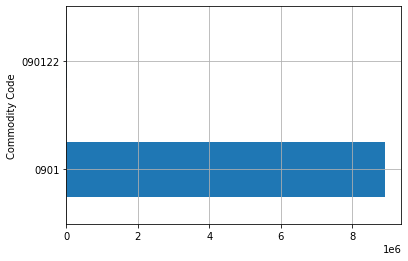

In [84]:
coffee_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

In [85]:
monthlies=coffee_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                                                                                                 Trade Flow  Period
Coffee, whether or not roasted or decaffeinated; husks and skins; coffee substitutes containing coffee in any proportion  Imports     202001     451900
                                                                                                                                      202002     470150
                                                                                                                                      202003     290795
                                                                                                                                      202004     430266
                                                                                                                                      202005     494104
                                                                                                   

In [86]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
coffee_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

sum  \
Commodity                                          Trade Flow Period             
Coffee, whether or not roasted or decaffeinated... Exports    202001  10207367   
                                                              202002  17363670   
                                                              202003  24235184   
                                                              202004  24694627   
                                                              202005  21552338   
                                                              202006  28125161   
                                                              202007  17451599   
                                                              202008  14289965   
                                                              202010  12657631   
                                                              202011  17238301   
                                                              202012  12582791   
                                                   Imports    202001    451900   
                                                              202002    470150   
                                                              202003    290795   
                                                              202004    430266   
                                                              202005    494104   
                                                              202006    304431   
                                                              202007    307792   
                                                              202008    845899   
                                                              202010   2386906   
                                                              202011   1235280   
                                                              202012   1709841   
Coffee; roasted, decaffeinated                     Exports    202002     21478   
                                                              202003      4381   
                                                              202004      2436   
                                                              202005        75   
                                                              202006        10   
                                                              202007       301   
                                                              202008     26466   
                                                              202010      6779   
                                                              202011      3592   
                                                              202012      8534   
                                                   Imports    202001        65   
                                                              202003       456   
                                                              202005      1514   
                                                              202008      3737   
                                                              202010      1838   
                                                              202011     18754   
                                                              202012       757   

                                                                       min  \
Commodity                                          Trade Flow Period         
Coffee, whether or not roasted or decaffeinated... Exports    202001   195   
                                                              202002  2466   
                                                              202003   156   
                                                              202004   705   
                                                              202005   442   
                                                              202006  1604   
                                                              202007    12   
          

<AxesSubplot:ylabel='Commodity Code,Period'>

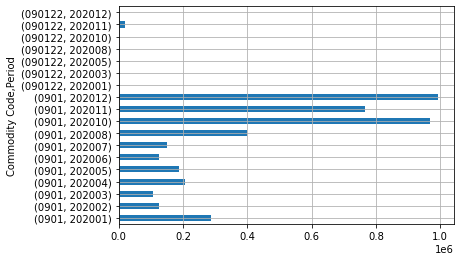

In [87]:
coffee_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

In [88]:
coffee_bypartner_total=coffee[coffee["Trade Flow"]=='Imports'].groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
coffee_bypartner_total.head(5)

Partner
Afghanistan         10
Australia            5
Belgium           2401
Brazil          121820
Burundi        2558559
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Partner'>

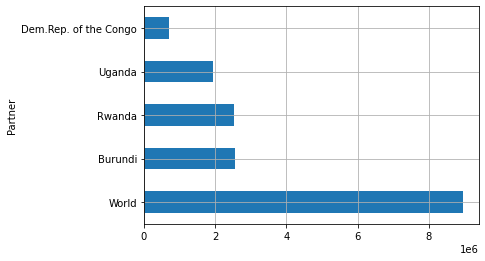

In [89]:
coffee_bypartner_total.sort_values(ascending=False, inplace=False).head(5).plot(kind='barh')

In [106]:
coffee_exports = coffee[coffee['Trade Flow'] == 'Exports']
coffee_countries_exports = coffee_countries[coffee_countries['Trade Flow'] == 'Exports']
coffee_world_exports=coffee_world[coffee_world['Trade Flow'] == 'Exports']

In [107]:
coffee_countries_exports_totals=coffee_countries_exports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
coffee_countries_exports_totals.sort_values('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
United States of America,42828388
Germany,32760425
Belgium,26339139
Rep. of Korea,17087422
Sweden,11718912


In [111]:
def groupsWithExportsOver25million(g):
    return g['Trade Value (US$)'].sum() > 25000000

rows=coffee_countries_exports.groupby(['Commodity','Partner']).filter(groupsWithExportsOver25million)

In [112]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum)

Commodity                                                                                                                 Partner                 
Coffee, whether or not roasted or decaffeinated; husks and skins; coffee substitutes containing coffee in any proportion  Belgium                     26339139
                                                                                                                          Germany                     32760425
                                                                                                                          United States of America    42828378
Name: Trade Value (US$), dtype: int64

<AxesSubplot:ylabel='Commodity,Partner'>

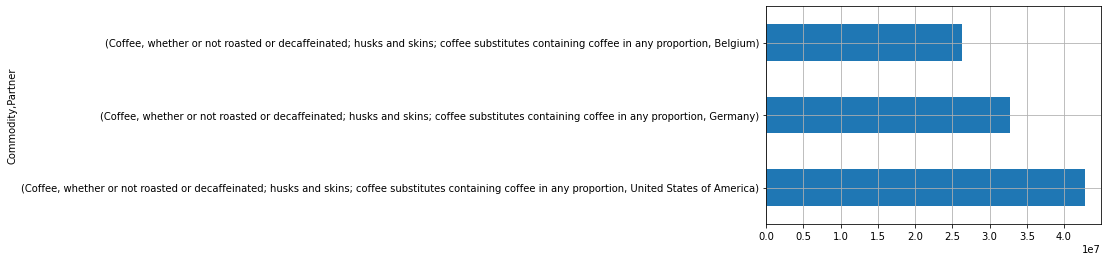

In [113]:
rows.groupby(['Commodity','Partner'])['Trade Value (US$)'].aggregate(sum).sort_values(inplace=False,ascending=False).plot(kind='barh')

In [114]:
def weakpartner(g):
    return len(g)<=3 | g['Trade Value (US$)'].sum()<25000

weak_coffee_countries_exports=coffee_countries_exports.groupby(['Commodity','Partner']).filter(weakpartner)
weak_coffee_countries_exports.groupby(['Commodity','Partner'])[['Trade Value (US$)']].aggregate([len,sum])

Trade Value (US$)  \
                                                                                          len   
Commodity                                          Partner                                      
Coffee, whether or not roasted or decaffeinated... Areas, nes                               1   
                                                   Bahrain                                  3   
                                                   Bulgaria                                 1   
                                                   Bunkers                                 11   
                                                   Ghana                                    1   
                                                   Iraq                                     1   
                                                   Israel                                   1   
                                                   Kuwait                                   1   
                                                   Lebanon                                  1   
                                                   Qatar                                    3   
                                                   Rwanda                                   1   
                                                   Sudan                                    1   
                                                   Uganda                                   6   
                                                   United Rep. of Tanzania                  1   
Coffee; roasted, decaffeinated                     Bahrain                                  3   
                                                   Bunkers                                  4   
                                                   Free Zones                               3   
                                                   Other Asia, nes                          1   
                                                   Rep. of Korea                            1   
                                                   Rwanda                                   1   
                                                   Somalia                                  1   
                                                   United Arab Emirates                     2   
                                                   United Kingdom                           2   
                                                   United States of America                 1   

                                                                                    
                                                                               sum  
Commodity                                          Partner                          
Coffee, whether or not roasted or decaffeinated... Areas, nes                 2231  
                                                   Bahrain                   11300  
                                                   Bulgaria                  16202  
                                                   Bunkers                    9460  
                                                   Ghana                        87  
                                                   Iraq                       1200  
                                                   Israel                        1  
                                                   Kuwait                     1875  
                                                   Lebanon                     286  
                                                   Qatar                      1123  
                                                   Rwanda                      162  
                                                   Sudan                     17223  
                                                   Uganda                    12000  
                                                   United Rep. of Tanzania   19542  
Coffee; roa

In [115]:
KEYPARTNERS = ['Belgium','Germany','United States of America']
coffee_keypartners = coffee_countries[coffee_countries['Partner'].isin(KEYPARTNERS)]

pd.pivot_table(coffee_keypartners,
               index=['Year','Partner','Trade Flow','Commodity'],
               values='Trade Value (US$)',
               aggfunc=sum)

Trade Value (US$)
Year Partner                  Trade Flow Commodity                                                            
2020 Belgium                  Exports    Coffee, whether or not roasted or decaffeinated...           26339139
                              Imports    Coffee, whether or not roasted or decaffeinated...               2401
     Germany                  Exports    Coffee, whether or not roasted or decaffeinated...           32760425
                              Imports    Coffee, whether or not roasted or decaffeinated...               2009
                                         Coffee; roasted, decaffeinated                                    101
     United States of America Exports    Coffee, whether or not roasted or decaffeinated...           42828378
                                         Coffee; roasted, decaffeinated                                     10
                              Imports    Coffee, whether or not roasted or decaffeinated...                649
                                         Coffee; roasted, decaffeinated                                     65

In [117]:
report = pd.pivot_table(coffee_keypartners,
               index=['Year','Partner','Commodity'],
               columns='Trade Flow',
               values='Trade Value (US$)',
               aggfunc=sum)


report.sort_values('Exports', ascending=False)

Trade Flow                                                                           Exports  \
Year Partner                  Commodity                                                        
2020 United States of America Coffee, whether or not roasted or decaffeinated...  42828378.0   
     Germany                  Coffee, whether or not roasted or decaffeinated...  32760425.0   
     Belgium                  Coffee, whether or not roasted or decaffeinated...  26339139.0   
     United States of America Coffee; roasted, decaffeinated                            10.0   
     Germany                  Coffee; roasted, decaffeinated                             NaN   

Trade Flow                                                                        Imports  
Year Partner                  Commodity                                                    
2020 United States of America Coffee, whether or not roasted or decaffeinated...    649.0  
     Germany                  Coffee, whether or not roasted or decaffeinated...   2009.0  
     Belgium                  Coffee, whether or not roasted or decaffeinated...   2401.0  
     United States of America Coffee; roasted, decaffeinated                         65.0  
     Germany                  Coffee; roasted, decaffeinated                        101.0

<AxesSubplot:ylabel='Year,Partner,Commodity'>

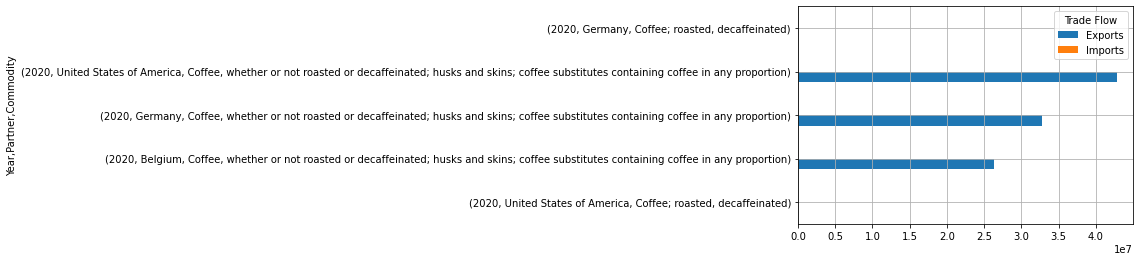

In [118]:
report.sort_values('Exports').plot(kind='barh')

**Exploring open data further**

The last few years has seen a wide variety of local and national governments and
agencies publishing data as ‘open data’ that can be freely re-used by anyone. Explore
some of this data yourself, at the following links:

- [UK government open data site](http://data.gov.uk/) – a directory of UK public datasets

- [US government open data site](http://data.gov/) – the home of the US Government’s open data

- [Open Knowledge Global Open Data Index](http://index.okfn.org/dataset/) – a comprehensive directory of national
open data initiatives

- [Open Data Inception](http://opendatainception.io/) – a geographic list of over 1500 data portals around the world

- [Google Public Data Explorer](https://www.google.com/publicdata/directory) – a further list of data providers, with charts for some
datasets

- Many towns and cities also have their own data sites: search for the name of your
town and the keywords ‘open data store’